<a href="https://colab.research.google.com/github/shivi13102/Vehicles_Efficiency_Rate_Prediction/blob/main/EDA_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the datasets
train = pd.read_csv("/content/cleaned_train_data.csv")
test = pd.read_csv("/content/cleaned_test_data.csv")

In [7]:
numerical_columns = [
    'PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION', 'DISPLACEMENT', 'CAPACITY',
    'PISTON_COUNT', 'BLENDED_CONSUMPTION', 'OUTPUT', 'EFFICIENCY_RATIO', 'YEARS_IN_SERVICE',
    'MILEAGE', 'HIGHWAY_USAGE'
]

categorical_columns = ['GEARBOX_TYPE', 'BODY_STYLE', 'ENERGY_SOURCE']

# **Exploratory Data Analysis** (EDA)

### 1. Descriptive Statistics

In [9]:
# Displaying descriptive statistics for the numerical columns
display(train[numerical_columns].describe())

,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,OUTPUT,EFFICIENCY_RATIO,YEARS_IN_SERVICE,MILEAGE,HIGHWAY_USAGE
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000
mean,0.242026,0.429549,0.347186,0.371640,0.283869,5.753400,0.346595,0.358344,0.577985,10.0,0.441030,0.300291
std,0.147460,0.185905,0.207286,0.226097,0.240546,1.833265,0.214824,0.243412,0.174258,0.0,0.142902,0.206327
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,10.0,0.000000,0.000000
25%,0.138906,0.289365,0.199219,0.183333,0.187500,4.000000,0.189573,0.158537,0.488889,10.0,0.350000,0.147436
50%,0.207406,0.408840,0.296875,0.366667,0.187500,6.000000,0.298578,0.317073,0.588889,10.0,0.400000,0.262821
75%,0.317714,0.527624,0.460938,0.500000,0.312500,8.000000,0.436019,0.531250,0.688889,10.0,0.550000,0.403846
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,10.0,1.000000,1.000000


## Univariate Analysis:

### 2. Histogram (Numerical Data)

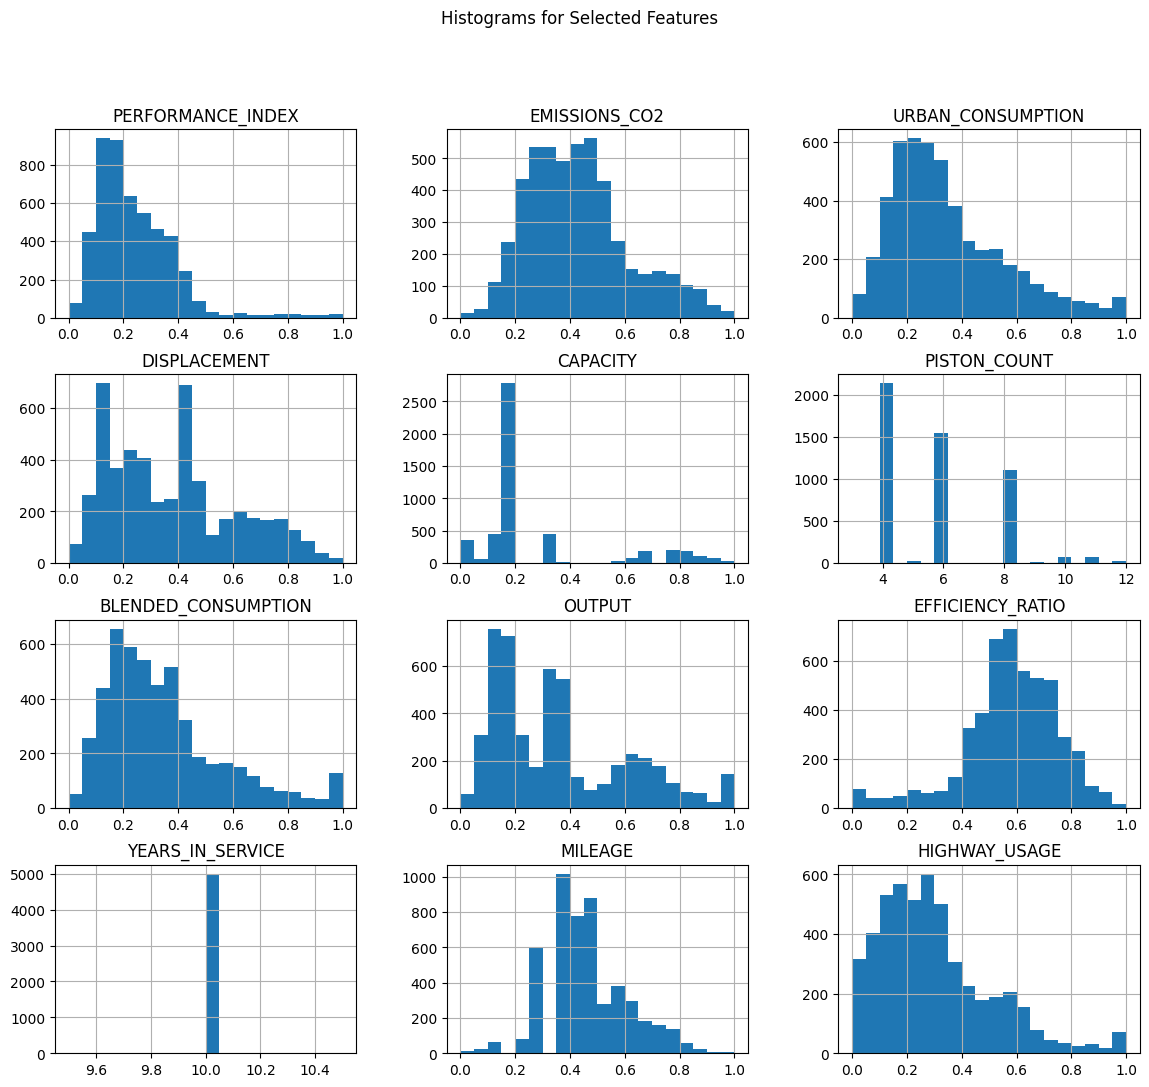

In [10]:
# Plotting histograms for the selected columns
train[numerical_columns].hist(bins=20, figsize=(14, 12))
plt.suptitle('Histograms for Selected Features')
plt.show()

### 3. Bar Plot (Categorical Data)

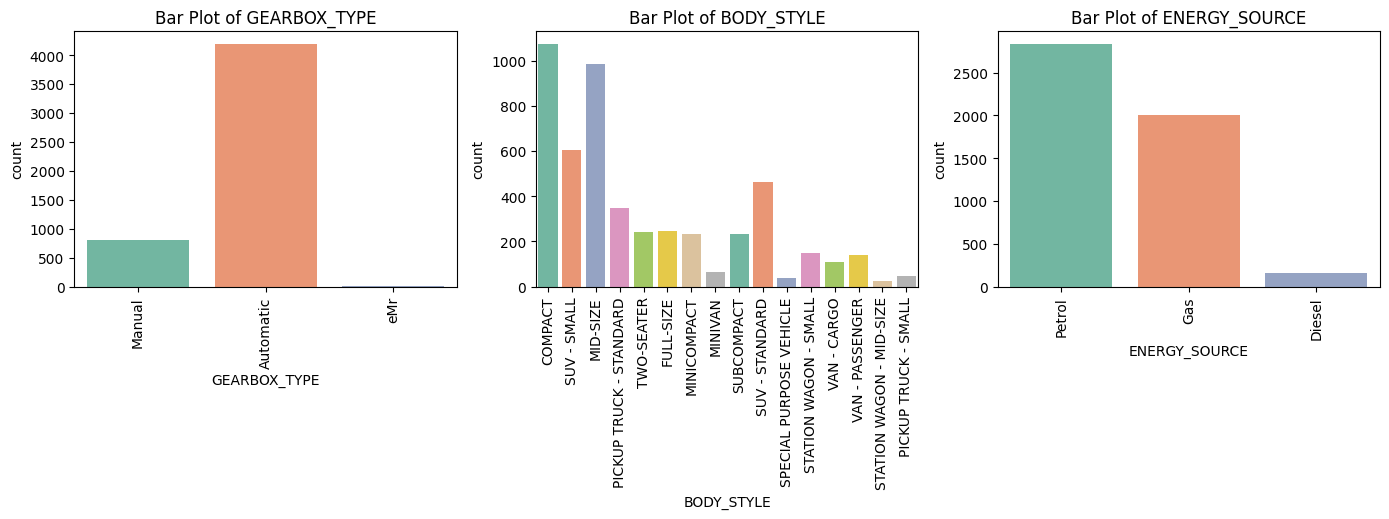

In [21]:
# Plotting bar plots for each categorical column
plt.figure(figsize=(14, 8))

for i, col in enumerate(categorical_columns, 1):
    if col in train.columns:  # Ensure the column exists in the dataset
        plt.subplot(2, 3, i)  # 2 rows, 3 columns
        sns.countplot(data=train, x=col, hue=col, palette='Set2', legend=False)  # Assign x to hue
        plt.title(f'Bar Plot of {col}')
        plt.xticks(rotation=90)  # Set rotation to 90 degrees for vertical labels
    else:
        print(f"Column {col} not found in the dataset.")

plt.tight_layout()
plt.show()

### 4. Skewness and Kurtosis

In [24]:
# Calculating skewness and kurtosis for each selected column
skewness = train[numerical_columns].skew()
kurtosis = train[numerical_columns].kurt()

# Displaying the skewness and kurtosis
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 PERFORMANCE_INDEX      1.825545
EMISSIONS_CO2          0.644267
URBAN_CONSUMPTION      1.018151
DISPLACEMENT           0.567436
CAPACITY               1.487949
PISTON_COUNT           0.786446
BLENDED_CONSUMPTION    1.155193
OUTPUT                 0.880040
EFFICIENCY_RATIO      -0.839696
YEARS_IN_SERVICE       0.000000
MILEAGE                0.522915
HIGHWAY_USAGE          1.064035
dtype: float64

Kurtosis:
 PERFORMANCE_INDEX      5.359589
EMISSIONS_CO2          0.016671
URBAN_CONSUMPTION      0.675657
DISPLACEMENT          -0.568246
CAPACITY               0.976241
PISTON_COUNT           0.029028
BLENDED_CONSUMPTION    0.987981
OUTPUT                -0.147817
EFFICIENCY_RATIO       1.330631
YEARS_IN_SERVICE       0.000000
MILEAGE                0.684299
HIGHWAY_USAGE          1.086715
dtype: float64


### 5. Density Plots (Kernel Density Estimation)

<ipython-input-25-3dc32489754b>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train[col], fill=True, color='skyblue', linewidth=2)


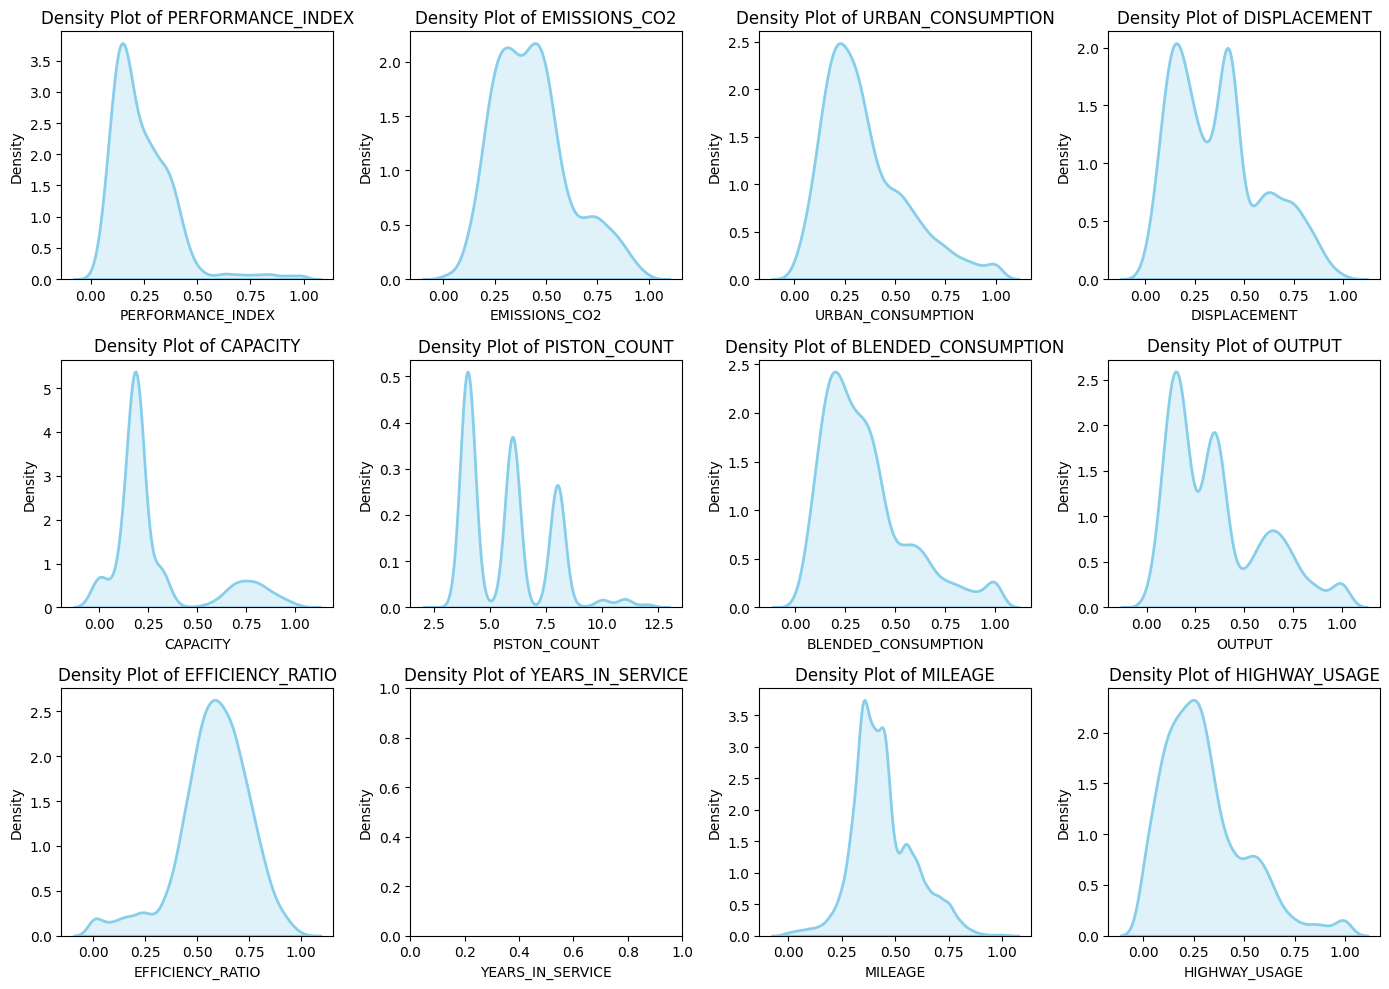

In [25]:
# Plotting density plots for selected columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns
    sns.kdeplot(train[col], fill=True, color='skyblue', linewidth=2)
    plt.title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

## Bivariate Analysis:

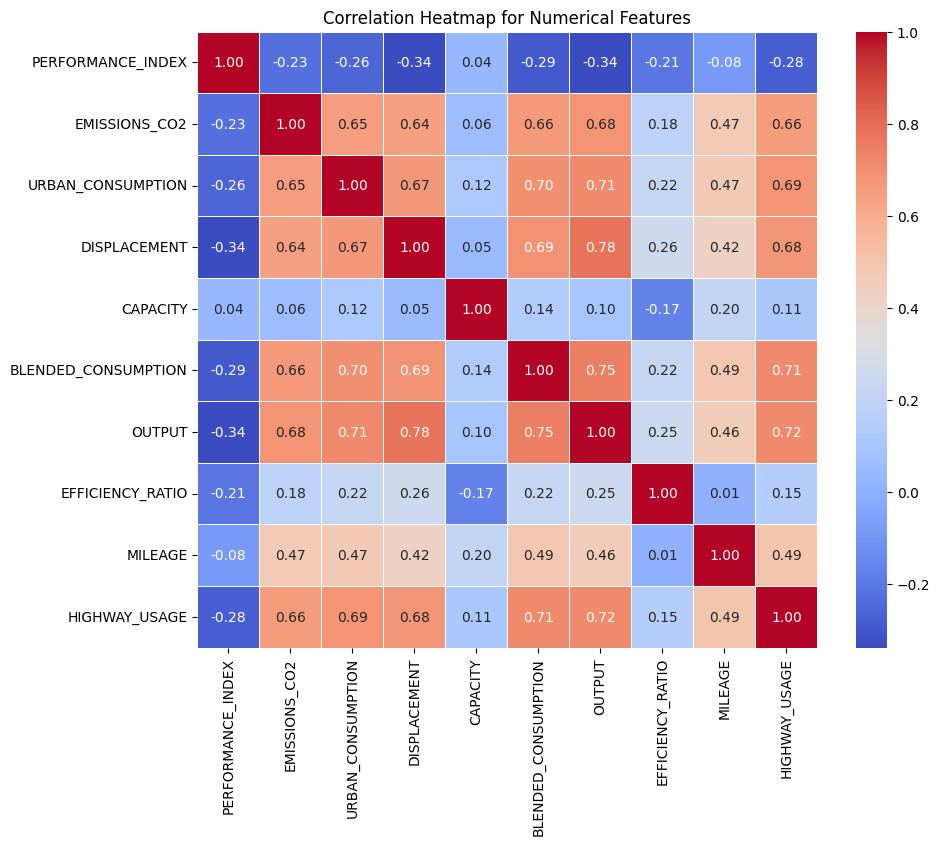

In [26]:
# Calculate correlation matrix
correlation_matrix = train[['PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
                            'DISPLACEMENT', 'CAPACITY', 'BLENDED_CONSUMPTION', 'OUTPUT',
                            'EFFICIENCY_RATIO', 'MILEAGE', 'HIGHWAY_USAGE']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

The heatmap you provided shows the correlation between different numerical features, likely related to vehicle performance and fuel consumption. Here's a breakdown of the key conclusions we can draw:

**Strong Positive Correlations:**

*   **Emissions_CO2, Urban_Consumption, Displacement, Blended_Consumption, Output, and Highway_Usage:** These features show strong positive correlations with each other (values generally above 0.6). This makes intuitive sense:
    *   Larger engine displacement (Displacement) tends to lead to higher CO2 emissions (Emissions_CO2) and fuel consumption (Urban_Consumption, Blended_Consumption, Highway_Usage).
    *   Higher engine output (Output) also correlates with increased fuel consumption and emissions.
*   **Urban_Consumption and Blended_Consumption:** These are very strongly correlated (around 0.7). This is expected as blended consumption likely includes urban consumption as a component.

**Weak or Negative Correlations:**

*   **Performance_Index:** This feature shows a weak negative correlation with most other features, particularly Emissions_CO2, Urban_Consumption, Displacement, Blended_Consumption, Output, and Highway_Usage (around -0.2 to -0.3). This suggests that a higher performance index might be associated with lower emissions and fuel consumption, which is a desirable outcome.
*   **Capacity:** This feature has relatively weak correlations with most other features, both positive and negative. It has a slight positive correlation with Urban_Consumption and Blended_Consumption, and a slight negative correlation with Efficiency_Ratio.
*   **Efficiency_Ratio:** This has a weak negative correlation with Capacity and other features.

**Other Observations:**

*   **Mileage:** This feature shows a moderate positive correlation with Emissions_CO2, Urban_Consumption, Blended_Consumption, Output, and Highway_Usage (around 0.4 to 0.5).
*   The diagonal of the heatmap shows perfect correlations (1.0) as each feature is perfectly correlated with itself.

**Overall Interpretation:**

The heatmap indicates strong interrelationships between factors related to engine size, power output, fuel consumption, and emissions. Larger engines and higher power generally lead to increased fuel consumption and CO2 emissions. The Performance_Index appears to be a factor that potentially mitigates these negative effects. Efficiency_Ratio has a weak negative correlation with other features. The Capacity has little to no correlation with other features.

**Important Considerations:**

*   **Correlation does not equal causation:** While the heatmap shows relationships between variables, it doesn't prove that one causes the other. There might be other underlying factors at play.
*   **Context is crucial:** The specific meaning of these correlations depends on the context of the data. Knowing what each feature represents is essential for accurate interpretation.

In summary, the heatmap provides a valuable overview of the relationships between different variables related to vehicle performance and fuel efficiency. It highlights areas where improvements in one area might impact others.


**Implications and Actionable Points:**
* **Performance Improvement:** The negative correlation between the Performance_Index and various other variables suggests that improving performance might lead to reduced emissions and fuel consumption, aligning with sustainable vehicle development goals. You might want to explore vehicles with higher performance indices to investigate whether their environmental impact is lower.

* **Fuel Efficiency and Emissions Reduction:** The strong correlation between Displacement, Output, and Emissions_CO2 suggests a clear area for improvement in reducing the environmental impact of larger engines. You might want to focus on technologies that can achieve higher output without increasing displacement significantly.

* **Blended vs. Urban Consumption:** Since Urban_Consumption and Blended_Consumption are so closely related, focusing on reducing urban consumption might automatically help in lowering blended consumption as well.

* **Exploring Efficiency:** Efficiency_Ratio could be key to identifying vehicles that provide the best performance-to-fuel consumption ratio. Further analysis of this feature might help identify best-in-class models that are both powerful and fuel-efficient.

* **Capacity as a Non-Predictor:** Since Capacity does not show strong correlations with other features, it might not be a useful predictor for performance or fuel consumption. It might be worth investigating whether this feature could be dropped in certain analyses or if it should be combined with others to improve its predictive value.